In [1]:
pip install opencv-python matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


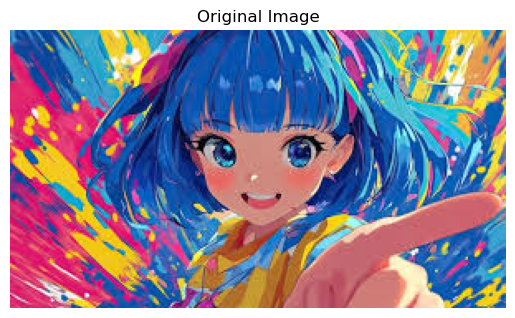

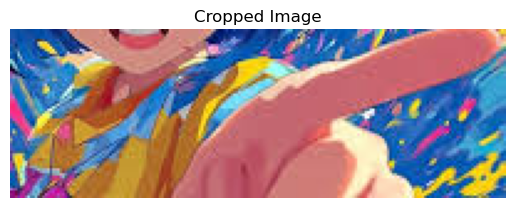

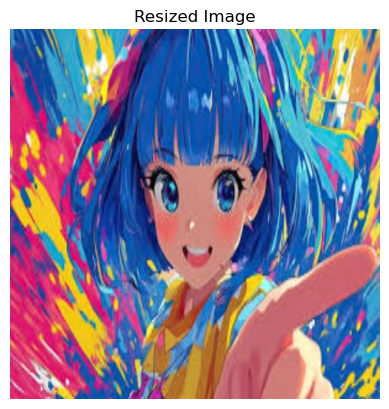

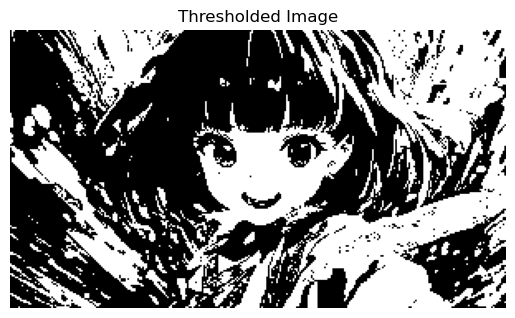

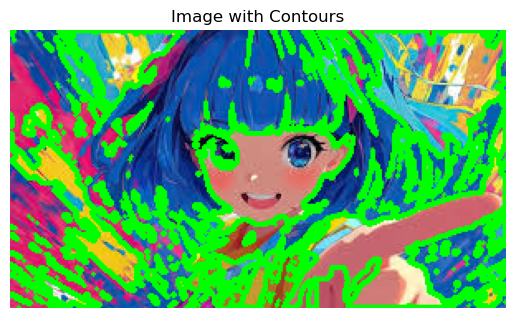

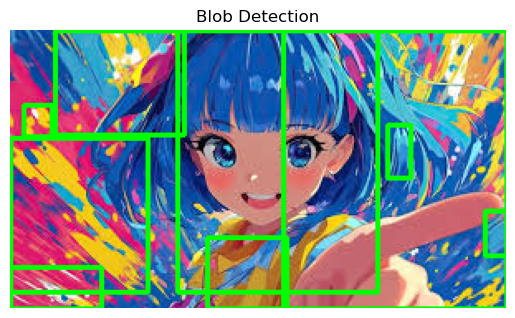

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image using OpenCV
img = cv2.imread('cv_lab_model-2.jpeg')  # Replace with the path to your image

# Check if the image was loaded successfully
if img is None:
    print("Error: Image not found!")
    exit()

# 1. Display original image
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

# 2. Cropping (example coordinates)
x, y, w, h = 100, 100, 200, 200  # Coordinates: (x, y) top-left, (w, h) width and height
cropped_img = img[y:y+h, x:x+w]

# Display cropped image
cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_img_rgb)
plt.title('Cropped Image')
plt.axis('off')
plt.show()

# 3. Resizing the image
resized_img = cv2.resize(img, (500, 500))  # Resize to 500x500

# Display resized image
resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
plt.imshow(resized_img_rgb)
plt.title('Resized Image')
plt.axis('off')
plt.show()

# 4. Thresholding (convert to grayscale and apply threshold)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

# Display thresholded image
plt.imshow(thresh_img, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

# 5. Contour analysis
# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)  # Green contours with thickness 2

# Display image with contours
contour_img_rgb = cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB)
plt.imshow(contour_img_rgb)
plt.title('Image with Contours')
plt.axis('off')
plt.show()

# 6. Blob Detection (Connected Components)
# Apply threshold to get binary image for blob detection
_, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

# Detect blobs using connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_img)

# Create a new image to draw bounding boxes around blobs
blob_img = img.copy()

# Draw bounding boxes for each detected blob
for i in range(1, num_labels):  # Start from 1 to ignore the background
    x, y, w, h, area = stats[i]
    if area > 100:  # Only draw blobs with area > 100 (adjust as needed)
        cv2.rectangle(blob_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display image with detected blobs
blob_img_rgb = cv2.cvtColor(blob_img, cv2.COLOR_BGR2RGB)
plt.imshow(blob_img_rgb)
plt.title('Blob Detection')
plt.axis('off')
plt.show()
